<a href="https://colab.research.google.com/github/weasel-codes/channel-pruning/blob/main/L2_PECSS_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


one time start

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
!ls

dataset   old_vgg      vgg16_m_19  vgg16_m_35  vgg16_m_45  vgg16_m_60
drive	  sample_data  vgg16_m_25  vgg16_m_4   vgg16_m_50  vgg16_m_9
new_vgg4  vgg16_m_14   vgg16_m_30  vgg16_m_40  vgg16_m_55


In [ ]:
!mkdir /root/.kaggle

In [ ]:
!mv kaggle.json /root/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ifigotin/imagenetmini-1000

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!mv kaggle.json /root/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ifigotin/imagenetmini-1000

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip /content/imagenetmini-1000.zip

unzip:  cannot find or open /content/imagenetmini-1000.zip, /content/imagenetmini-1000.zip.zip or /content/imagenetmini-1000.zip.ZIP.


one time end

In [ ]:
!pip install kerop

  Created wheel for kerop: filename=kerop-0.1.4.post2105221903-cp37-none-any.whl size=5824 sha256=c873450fd85c0c038e0dd67cc509a35beb44ec2f2c5e68dc54dcbae2f24ef02c
  Stored in directory: /root/.cache/pip/wheels/52/14/1c/ac2ee932faa6bc904b26430a266195a515ccaa79f73a258b88
Successfully built kerop


In [ ]:
pip install tf-explain

     |████████████████████████████████| 51kB 4.4MB/s 


In [ ]:
pip install kerassurgeon

     |████████████████████████████████| 286kB 13.1MB/s 
     |████████████████████████████████| 2.2MB 38.1MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: importlib-metadata 4.0.1
    Uninstalling importlib-metadata-4.0.1:
      Successfully uninstalled importlib-metadata-4.0.1
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4
  Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Importing needed library and degrading the version of tensorflow

In [ ]:
import numpy as np

%tensorflow_version 1.x
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from kerassurgeon import identify
from kerassurgeon.operations import delete_channels, delete_layer
from kerassurgeon import Surgeon

from tensorflow.keras.applications.xception import decode_predictions
from tf_explain.core.activations import ExtractActivations
import kerop
%matplotlib inline

TensorFlow 1.x selected.


In [ ]:
print(tf.__version__)

1.15.2


Loading the pretatined model

In [ ]:
model=tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=True)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


553467904/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Compiling the model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.applications.vgg16 import preprocess_input,decode_predictions

Using TensorFlow backend.


Unzip dataset 

Unzipping the test dataset 

In [ ]:
!unzip /content/drive/MyDrive/dataset-20210506T124641Z-001.zip

Archive:  /content/drive/MyDrive/dataset-20210506T124641Z-001.zip
  inflating: dataset/n03447721_ILSVRC2012_val_00041280.JPEG  
  inflating: dataset/n03788365_ILSVRC2012_val_00006572.JPEG  
  inflating: dataset/n03095699_ILSVRC2012_val_00019229.JPEG  
  inflating: dataset/n02127052_ILSVRC2012_val_00012958.JPEG  
  inflating: dataset/n02129165_ILSVRC2012_val_00016765.JPEG  
  inflating: dataset/n03314780_ILSVRC2012_val_00000624.JPEG  
  inflating: dataset/n03837869_ILSVRC2012_val_00016087.JPEG  
  inflating: dataset/n01843383_ILSVRC2012_val_00014068.JPEG  
  inflating: dataset/n03584829_ILSVRC2012_val_00012032.JPEG  
  inflating: dataset/n02134084_ILSVRC2012_val_00021889.JPEG  
  inflating: dataset/n03447721_ILSVRC2012_val_00026287.JPEG  
  inflating: dataset/n03584829_ILSVRC2012_val_00025030.JPEG  
  inflating: dataset/n02134084_ILSVRC2012_val_00002578.JPEG  
  inflating: dataset/n02129165_ILSVRC2012_val_00030575.JPEG  
  inflating: dataset/n03788365_ILSVRC2012_val_00046284.JPEG  
  in

checking computation time before pruning

Evaluation

In [ ]:
# model.evaluate(test_generator)

path for dataset

In [ ]:
path="/content/dataset"
total_time=0.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import time
import os

In [ ]:
def modelFlops(test_model) :
  # analyze FLOPS
  layer_name, layer_flops, inshape, weights = kerop.profile(test_model)

  flops = 0
  # visualize results
  for name, flop, shape, weight in zip(layer_name, layer_flops, inshape, weights):
      flops = flops + flop

  return flops

In [ ]:
pred_b = []
for filename in os.listdir(path) :
      label = filename.split('_')[0]
      file_path = path + "/" + filename
      image=tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))  # reading image (Folder path and image name )
      
      image=np.array(image)
      image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
      image=preprocess_input(image)

      x=time.time()
      op1=model.predict(image)
      y=time.time()
      total_time = total_time + (y-x)
      label1=decode_predictions(op1,top=1)
      pred_b.append([label, label1[0][0][0]])

count = 0
for i in range(len(pred_b)) :
    if pred_b[i][0] == pred_b[i][1] :
      count = count + 1
print('Model Flops : ', modelFlops(model))
print('Total : ', len(pred_b), ', Correct : ', count, ', Accuracy : ', (100*count/len(pred_b)))
print('Time Taken for prediction : ', (total_time/len(pred_b)) )

40960/35363 [==================================] - 0s 0us/step
Model Flops :  30932349056
Total :  84 , Correct :  83 , Accuracy :  98.80952380952381
Time Taken for prediction :  0.09785511096318562


In [ ]:
print("Total parameters before pruning",model.count_params())#toatal parameters before pruning

Total parameters before pruning 138357544


In [ ]:
# test_dataset = image.ImageDataGenerator(
#  rescale=1./255,
#  )

In [ ]:
# test_generator = test_dataset.flow_from_directory(
#     "/content/imagenet-mini/val",
#     target_size = (224, 224))

Saving the model before pruning

In [ ]:
model.save("old_vgg")

Checking the model size before pruning

In [ ]:
import os
import math
# Get file size in bytes for a given model
print("Model size after pruning=>",(os.stat('/content/old_vgg').st_size)/math.pow(2,20)," Mega Bytes")

Model size after pruning=> 527.8715286254883  Mega Bytes


# Single Layer Pruning

In [ ]:
surgeon = Surgeon(model)#initialising surgeon for the model
layer1 = model.layers[2]#selectig a particular layer
layer1_weights = layer1.get_weights()
weights = layer1_weights[0]
print("Number of channels : ", len(weights[0][2]))

Number of channels :  64


In [ ]:
# import numpy as np
# max=0
# max_i=0
# for i in range(len(layer1_weights)):
#   temp=np.sum(layer1_weights[i])
#   if temp>max:
#     max=temp
#     max_i=i
# channel_to_delete=i

In [ ]:
# surgeon = Surgeon(model)

In [ ]:
surgeon = Surgeon(model)
surgeon.add_job('delete_channels', layer1, channels=[2, 6, 8,32,38])#deleting selected channels at layer 1
new_model = surgeon.operate()

Deleting 5/64 channels from layer: block1_conv2
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Multi layer Pruning

In [ ]:
surgeon = Surgeon(model)
#getting all the convolution layer and storing the weight tensors
layer1 = model.layers[1]
layer2 = model.layers[2]
layer4 = model.layers[4]
layer5 = model.layers[5]
layer7 = model.layers[7]
layer8 = model.layers[8]
layer9 = model.layers[9]
layer11= model.layers[11]
layer12= model.layers[12]
layer13 = model.layers[13]
layer15 =model.layers[15]
layer16 =model.layers[16]
layer17 =model.layers[17]

layer1_weights = layer1.get_weights()
layer2_weights = layer2.get_weights()
layer4_weights = layer4.get_weights()
layer5_weights = layer5.get_weights()
layer7_weights = layer7.get_weights()
layer8_weights = layer8.get_weights()
layer9_weights = layer9.get_weights()
layer11_weights = layer11.get_weights()
layer12_weights = layer12.get_weights()
layer13_weights = layer13.get_weights()
layer15_weights = layer15.get_weights()
layer16_weights = layer16.get_weights()
layer17_weights = layer17.get_weights()

In [ ]:
conv_layer_weights=[layer1_weights,layer2_weights,layer4_weights,layer5_weights,layer7_weights,layer8_weights,layer9_weights,layer11_weights,layer12_weights,layer13_weights,layer15_weights,layer16_weights,layer17_weights]

In [ ]:
#rate of deletion
r=0.13
num_del_layer_wise=[0]*13#initialisation of list which will keep how many channels has to be delete at each layer
num_del_layer_wise

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
weights_dic_sort=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
import numpy as np
for i in range(len(conv_layer_weights)):#iterating over each conv layer
  weight=conv_layer_weights[i]
  weights_dic={}
  num_filters=len(weight[0][0][0])#getting number of channels
  if i!=0:
     num_del_layer_wise[i]=round(num_filters*r)#getting number of channels deleted at each layer
  print(num_filters)

  for j in range(num_filters):#iterating over each channels and finding the L2-Norm
    arr=np.square(weight[0][0][0][j])
    w_s=np.sum(arr)
    w_s=w_s/9
    filt=j #'filt_{}'.format(j)
    weights_dic[filt]=w_s#storing L2-Norm of each channel

  weights_dic_sort[i]=sorted(weights_dic.items(),key=lambda kv: kv[1])
  print("L2 norm of conv_layer{}\n".format(i+1),weights_dic_sort[i])

3
L2 norm of conv_layer1
 [(0, 0.24198773172166613), (2, 0.30829652150472003), (1, 0.35901959737141925)]
64
L2 norm of conv_layer2
 [(24, 0.0013315817341208458), (32, 0.003077487357788616), (40, 0.0034466187159220376), (29, 0.0036323455472787223), (55, 0.0036865133378240797), (2, 0.003937005168861813), (17, 0.003938651747173733), (38, 0.004155619276894463), (50, 0.004385071496168773), (6, 0.004532900121476915), (52, 0.004538122150633071), (44, 0.004670798364612792), (13, 0.004926790793736775), (9, 0.0050536783205138314), (11, 0.005262661311361525), (56, 0.005291312105125851), (36, 0.005295662416352166), (1, 0.005736995488405228), (22, 0.005856642292605506), (30, 0.006014215035570992), (27, 0.0060821543965074755), (39, 0.00614686475859748), (7, 0.006147119320101208), (42, 0.006453887455993229), (33, 0.006731046984593074), (46, 0.006868792904747857), (16, 0.007097007499800788), (19, 0.007155751188596089), (25, 0.007429348925749461), (15, 0.007786340183681912), (20, 0.008381515741348267),

In [ ]:
num_del_layer_wise

[0, 8, 8, 17, 17, 33, 33, 33, 67, 67, 67, 67, 67]

In [ ]:
layer=[1,2,4,5,7,8,9,11,12,13,15,16,17]

In [ ]:
new_model=model
for i in range(1,len(num_del_layer_wise)):
   surgeon = Surgeon(new_model)
   all_sorted_chanels_of_layer_i=[]#getting the channels which need to be deleted
   for ch in weights_dic_sort[i]:
     all_sorted_chanels_of_layer_i.append(ch[0])
   chanels=[]
   for k in range(num_del_layer_wise[i]):
     chanels.append(all_sorted_chanels_of_layer_i[k])
   surgeon.add_job('delete_channels', new_model.layers[layer[i]], channels=chanels)#deleting the channels at each layer
  #  all_sorted_chanels_of_layer_i.clear()
  #  chanels.clear()
   new_model = surgeon.operate()#fine tuning

Deleting 8/64 channels from layer: block1_conv2
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Deleting 8/128 channels from layer: block2_conv1
Deleting 17/128 channels from layer: block2_conv2
Deleting 17/256 channels from layer: block3_conv1
Deleting 33/256 channels from layer: block3_conv2
Deleting 33/256 channels from layer: block3_conv3
Deleting 33/512 channels from layer: block4_conv1
Deleting 67/512 channels from layer: block4_conv2
Deleting 67/512 channels from layer: block4_conv3
Deleting 67/512 channels from layer: block5_conv1
Deleting 67/512 channels from layer: block5_conv2
Deleting 67/512 channels from layer: block5_conv3


In [ ]:
new_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])#recompiling the model
new_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 56)      32312     
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 120)     60600     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 111)     119991    
_________________________________________________________________
block2_pool (MaxPooling2D)   multiple                  0  

evaluation

In [ ]:
# new_model.evaluate(test_generator)

In [ ]:
total_time=0.0

In [ ]:
pred_m = []

for filename in os.listdir(path):
    label = filename.split('_')[0]
    file_path = path + "/" + filename
    x=time.time()
    image=tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))  # reading image (Folder path and image name )
      
    image=np.array(image)
    image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    image=preprocess_input(image)

    op1=new_model.predict(image)
    y=time.time()
    total_time = total_time + (y-x)
    label1=decode_predictions(op1,top=1)
    pred_m.append([label, label1[0][0][0]])

count = 0
for i in range(len(pred_m)):
  if pred_m[i][0] == pred_m[i][1] :
    count = count + 1

print("####### FOR RATE : ", r)
print('Model Flops : ', modelFlops(new_model))
print('Total : ', len(pred_m), ', Correct : ', count, ', Accuracy : ', (100*count/len(pred_m)))
print('Time Taken for prediction : ', (total_time/len(pred_m)) )

40960/35363 [==================================] - 0s 0us/step
####### FOR RATE :  0.13
Model Flops :  24866417876
Total :  84 , Correct :  75 , Accuracy :  89.28571428571429
Time Taken for prediction :  0.10284691481363206


saving New model after pruning

In [ ]:
new_model.save("new_vgg4")

Checking the model size after pruning

In [ ]:
import os
import math
# Get file size in bytes for a given model
print("Model size after pruning=>",(os.stat('/content/new_vgg4').st_size)/math.pow(2,20)," Mega Bytes")

Model size after pruning=> 463.90422439575195  Mega Bytes


Parameters Reading(Calculating all the parameters for all the different rates)

In [ ]:
rates_m=[0]
params_m=[138357544]
model_size_m=[527.8]
accuracy_m=[98.8]
flops_m=[30932349056]

In [ ]:
rates=[0.01,0.02,0.03,0.04,0.05,0.06,0.07]#different values of rates
k=0
for r in rates:
  #counting number of channels to delete layerwise
  rates_m.append(r)
  print("######################################################################################################################################################################")
  num_del_layer_wise=[0]*13
  total_time=0.0
  for i in range(len(conv_layer_weights)):
    weight=conv_layer_weights[i]
    #weights_dic={}
    num_filters=len(weight[0][0][0])
    if i!=0:
      num_del_layer_wise[i]=round(num_filters*r)
  print("Number of channels to delete layerwise: ",num_del_layer_wise)
  #initialising new model for pruning
  new_model=tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=True)
  new_model.summary()

  #pruning the model
  for i in range(1,len(num_del_layer_wise)):
    surgeon = Surgeon(new_model)
    all_sorted_chanels_of_layer_i=[]
    for ch in weights_dic_sort[i]:
      all_sorted_chanels_of_layer_i.append(ch[0])
    chanels=[]
    for k in range(num_del_layer_wise[i]):
      chanels.append(all_sorted_chanels_of_layer_i[k])
    surgeon.add_job('delete_channels', new_model.layers[layer[i]], channels=chanels)
    #  all_sorted_chanels_of_layer_i.clear()
    #  chanels.clear()
    new_model = surgeon.operate()

  new_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
  new_model.summary()
  #calculating parameters
  pred_m = []

  for filename in os.listdir(path):
      label = filename.split('_')[0]
      file_path = path + "/" + filename
      x=time.time()
      image=tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))  # reading image (Folder path and image name )
        
      image=np.array(image)
      image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
      image=preprocess_input(image)

      op1=new_model.predict(image)
      y=time.time()
      total_time = total_time + (y-x)
      label1=decode_predictions(op1,top=1)
      pred_m.append([label, label1[0][0][0]])

  count = 0
  for i in range(len(pred_m)):
    if pred_m[i][0] == pred_m[i][1] :
      count = count + 1

  print("####### FOR RATE : ", r)
  print('Model Flops : ', modelFlops(new_model))
  flops_m.append(modelFlops(new_model))
  print('Total : ', len(pred_m), ', Correct : ', count, ', Accuracy : ', (100*count/len(pred_m)))
  accuracy_m.append((100*count/len(pred_m)))
  print('Time Taken for prediction : ', (total_time/len(pred_m)) )
  print("Number of parameter after pruning",new_model.count_params())
  params_m.append(new_model.count_params())
  new_model.save(("vgg16_m_"+str(k)))
  frm = "/content/" + "vgg16_m_" + str(k)
  print("Model size after pruning=>",(os.stat(frm).st_size)/math.pow(2,20)," Mega Bytes")
  model_size_m.append((os.stat(frm).st_size)/math.pow(2,20))
  k+=1


######################################################################################################################################################################
Number of channels to delete layerwise:  [0, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5]
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
___________

In [ ]:
print(rates_m)
print(accuracy_m)
print(params_m)
print(model_size_m)
print(flops_m)

[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
[98.8, 95.23809523809524, 96.42857142857143, 95.23809523809524, 95.23809523809524, 98.80952380952381, 97.61904761904762, 95.23809523809524]
[138357544, 137082213, 135824111, 134553649, 133303521, 131801014, 130549183, 129292115]
[527.8, 523.0066719055176, 518.2075271606445, 513.3612442016602, 508.5925178527832, 502.8610649108887, 498.0858497619629, 493.2906913757324]
[30932349056, 30390582674, 29978173943, 29444253833, 28973985902, 28543729797, 28017684184, 27625907196]


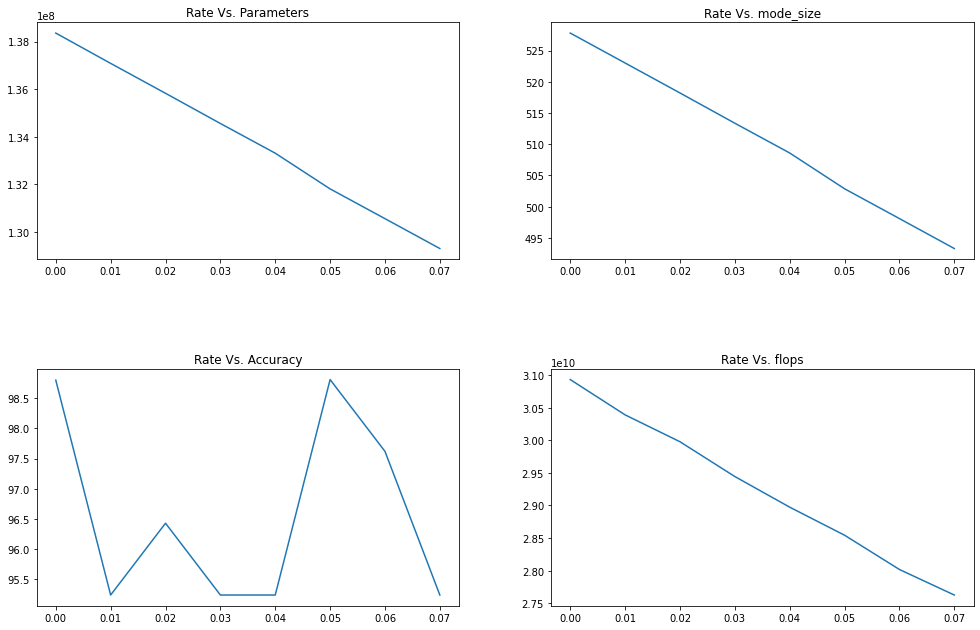

In [ ]:
fig,a =  plt.subplots(2,2)
a[0][0].plot(rates_m,params_m)
a[0][0].set_title('Rate Vs. Parameters')
a[0][1].plot(rates_m,model_size_m)
a[0][1].set_title('Rate Vs. mode_size')
a[1][0].plot(rates_m,accuracy_m)
a[1][0].set_title('Rate Vs. Accuracy')
a[1][1].plot(rates_m,flops_m)
a[1][1].set_title('Rate Vs. flops')
fig.tight_layout()
fig.set_size_inches(15, 10)
plt.show()

In [ ]:
rates=[0.08,0.09,0.10,0.12,0.14,0.16]#different values of rates
k=7
for r in rates:
  #counting number of channels to delete layerwise
  rates_m.append(r)
  print("######################################################################################################################################################################")
  num_del_layer_wise=[0]*13
  total_time=0.0
  for i in range(len(conv_layer_weights)):
    weight=conv_layer_weights[i]
    #weights_dic={}
    num_filters=len(weight[0][0][0])
    if i!=0:
      num_del_layer_wise[i]=round(num_filters*r)
  print("Number of channels to delete layerwise: ",num_del_layer_wise)
  #initialising new model for pruning
  new_model=tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=True)
  new_model.summary()

  #pruning the model
  for i in range(1,len(num_del_layer_wise)):
    surgeon = Surgeon(new_model)
    all_sorted_chanels_of_layer_i=[]
    for ch in weights_dic_sort[i]:
      all_sorted_chanels_of_layer_i.append(ch[0])
    chanels=[]
    for k in range(num_del_layer_wise[i]):
      chanels.append(all_sorted_chanels_of_layer_i[k])
    surgeon.add_job('delete_channels', new_model.layers[layer[i]], channels=chanels)
    #  all_sorted_chanels_of_layer_i.clear()
    #  chanels.clear()
    new_model = surgeon.operate()

  new_model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
  new_model.summary()
  #calculating parameters
  pred_m = []

  for filename in os.listdir(path):
      label = filename.split('_')[0]
      file_path = path + "/" + filename
      x=time.time()
      image=tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))  # reading image (Folder path and image name )
        
      image=np.array(image)
      image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
      image=preprocess_input(image)

      op1=new_model.predict(image)
      y=time.time()
      total_time = total_time + (y-x)
      label1=decode_predictions(op1,top=1)
      pred_m.append([label, label1[0][0][0]])

  count = 0
  for i in range(len(pred_m)):
    if pred_m[i][0] == pred_m[i][1] :
      count = count + 1

  print("####### FOR RATE : ", r)
  print('Model Flops : ', modelFlops(new_model))
  flops_m.append(modelFlops(new_model))
  print('Total : ', len(pred_m), ', Correct : ', count, ', Accuracy : ', (100*count/len(pred_m)))
  accuracy_m.append((100*count/len(pred_m)))
  print('Time Taken for prediction : ', (total_time/len(pred_m)) )
  print("Number of parameter after pruning",new_model.count_params())
  params_m.append(new_model.count_params())
  new_model.save(("vgg16_m_"+str(k)))
  frm = "/content/" + "vgg16_m_" + str(k)
  print("Model size after pruning=>",(os.stat(frm).st_size)/math.pow(2,20)," Mega Bytes")
  model_size_m.append((os.stat(frm).st_size)/math.pow(2,20))
  k+=1


######################################################################################################################################################################
Number of channels to delete layerwise:  [0, 5, 5, 10, 10, 20, 20, 20, 41, 41, 41, 41, 41]
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


ResourceExhaustedError: ignored

Visualisation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
rates_m.pop()

0.16

In [ ]:
print(rates_m)
print(accuracy_m)
print(params_m)
print(model_size_m)
print(flops_m)

[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.14]
[98.8, 95.23809523809524, 96.42857142857143, 95.23809523809524, 95.23809523809524, 98.80952380952381, 97.61904761904762, 95.23809523809524, 96.42857142857143, 95.23809523809524, 97.61904761904762, 94.04761904761905, 76.19047619047619]
[138357544, 137082213, 135824111, 134553649, 133303521, 131801014, 130549183, 129292115, 128051464, 126789469, 125539700, 123057783, 120345493]
[527.8, 523.0066719055176, 518.2075271606445, 513.3612442016602, 508.5925178527832, 502.8610649108887, 498.0858497619629, 493.2906913757324, 488.5581245422363, 483.74222564697266, 478.9748725891113, 469.5073890686035, 459.1611213684082]
[30932349056, 30390582674, 29978173943, 29444253833, 28973985902, 28543729797, 28017684184, 27625907196, 27169123281, 26597615857, 26216161797, 25271639292, 24376252022]


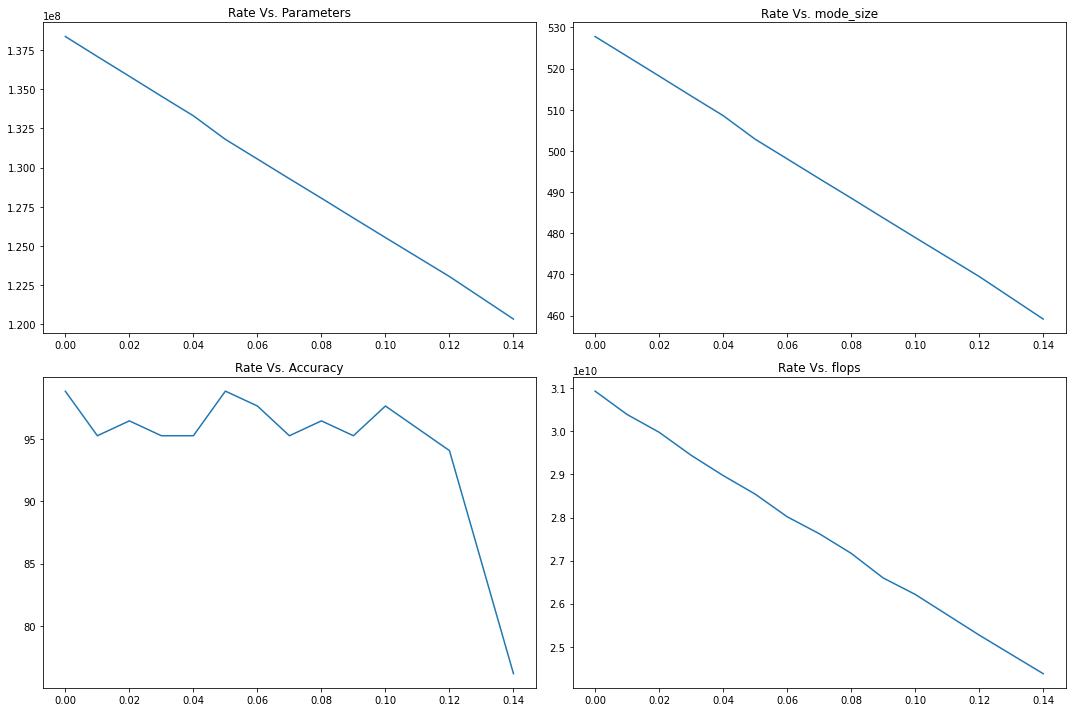

In [ ]:
fig,a =  plt.subplots(2,2)
a[0][0].plot(rates_m,params_m)
a[0][0].set_title('Rate Vs. Parameters')
a[0][1].plot(rates_m,model_size_m)
a[0][1].set_title('Rate Vs. mode_size')
a[1][0].plot(rates_m,accuracy_m)
a[1][0].set_title('Rate Vs. Accuracy')
a[1][1].plot(rates_m,flops_m)
a[1][1].set_title('Rate Vs. flops')
fig.set_size_inches(15, 10)
fig.tight_layout()

plt.show()

# Whole Model Pruning

In [ ]:
weights_dic_sort={}
import numpy as np
for i in range(len(conv_layer_weights)):#iterating over all conv layer
  weight=conv_layer_weights[i]#getting weight tensor
  #weights_dic={}
  num_filters=len(weight[0][0][0])#getting number of channels
  # if i!=0:
  #    num_del_layer_wise[i]=round(num_filters*r)
  print(num_filters)

  for j in range(num_filters):#iterating over each channel and calculate L2-Norm for that and stored it and a dictionary as key=(layer_index,channel_index) and value as L2-Norm
    arr=np.square(weight[0][0][0][j])
    w_s=np.sum(arr)
    w_s=w_s/9
    filt=i+1,j #'filt_{}'.format(j)
    weights_dic_sort[filt]=w_s

weights_dic_sort_item=sorted(weights_dic_sort.items(),key=lambda kv: kv[1])#sort the L2-Norm for getting most redundant channels
print("L2 norm of all conv_layer is\n",weights_dic_sort_item)
print("Length of weights_dic_sort_item is :",len(weights_dic_sort_item))

3
64
64
128
128
256
256
256
512
512
512
512
512
L2 norm of all conv_layer is
 [((4, 43), 6.286170618194673e-05), ((4, 69), 0.00035632564686238766), ((4, 123), 0.00039671956458025507), ((6, 149), 0.0010584016434020465), ((4, 0), 0.0010868039809995228), ((6, 255), 0.0012041685274905628), ((4, 49), 0.0012226545562346776), ((6, 37), 0.0013269330892297956), ((2, 24), 0.0013315817341208458), ((6, 44), 0.001364568869272868), ((6, 174), 0.0014009279095464284), ((6, 171), 0.0014320312895708615), ((11, 504), 0.001495065995388561), ((4, 27), 0.0015026376479201848), ((6, 232), 0.0015380571906765301), ((7, 140), 0.0015460838460259968), ((6, 54), 0.0015563347066442172), ((6, 243), 0.001574746540023221), ((6, 233), 0.0016129448389013608), ((6, 82), 0.001632794737815857), ((7, 228), 0.0016429902364810307), ((6, 123), 0.0016612890693876478), ((11, 58), 0.0016776197072532442), ((6, 110), 0.0016919286507699224), ((4, 89), 0.0017015053373244074), ((9, 351), 0.0017058576146761577), ((9, 362), 0.00171326587

In [ ]:
num_channels_to_delete_overall=round(len(weights_dic_sort_item)*r)#getting how many channels has to be deleted
num_channels_to_delete_overall

483

In [ ]:
dic_layer={}#getting at which layer which channel need to be deleted
for i in range(num_channels_to_delete_overall):
  if weights_dic_sort_item[i][0][0] not in dic_layer:
    dic_layer[weights_dic_sort_item[i][0][0]]=[]
    dic_layer[weights_dic_sort_item[i][0][0]].append(weights_dic_sort_item[i][0][1])
  else:
    dic_layer[weights_dic_sort_item[i][0][0]].append(weights_dic_sort_item[i][0][1])
 

In [ ]:
dic_layer

{2: [24],
 3: [14],
 4: [43,
  69,
  123,
  0,
  49,
  27,
  89,
  77,
  1,
  92,
  121,
  115,
  124,
  53,
  100,
  74,
  39,
  67,
  118],
 5: [95, 64],
 6: [149,
  255,
  37,
  44,
  174,
  171,
  232,
  54,
  243,
  233,
  82,
  123,
  110,
  181,
  58,
  64,
  47,
  202,
  61,
  186,
  28,
  102,
  165,
  131,
  57,
  68,
  152,
  48,
  74,
  121,
  96,
  67,
  137,
  8,
  13,
  235,
  139,
  158,
  136,
  128,
  134,
  180,
  125,
  135,
  190,
  52,
  120,
  49,
  167,
  122,
  175,
  92,
  117,
  108,
  42,
  188,
  38,
  71,
  39,
  147,
  173,
  185,
  209,
  237,
  24,
  16,
  242,
  100,
  225,
  9,
  81,
  150,
  18],
 7: [140,
  228,
  94,
  204,
  170,
  239,
  106,
  82,
  29,
  177,
  245,
  146,
  27,
  104,
  16,
  217,
  215,
  39,
  237,
  248,
  59,
  20,
  126,
  32,
  31,
  9,
  87,
  191,
  241,
  223,
  88,
  187,
  89,
  176,
  124,
  49,
  51,
  189,
  214,
  110,
  12,
  19,
  63,
  231,
  69,
  109,
  103,
  50,
  197,
  76,
  160,
  212,
  210,
  254],
 

In [ ]:
#loaing the model
new_model_w=tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=True)
new_model_w.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
dic_layer_sorted_l2={}#sorted channel indices at each layer so that it would be suitable for deletion
for key,value in dic_layer.items():
  dic_layer_sorted_l2[key]=sorted(value)

In [ ]:
dic_layer_sorted_l2

{2: [24],
 3: [14],
 4: [0,
  1,
  27,
  39,
  43,
  49,
  53,
  67,
  69,
  74,
  77,
  89,
  92,
  100,
  115,
  118,
  121,
  123,
  124],
 5: [64, 95],
 6: [8,
  9,
  13,
  16,
  18,
  24,
  28,
  37,
  38,
  39,
  42,
  44,
  47,
  48,
  49,
  52,
  54,
  57,
  58,
  61,
  64,
  67,
  68,
  71,
  74,
  81,
  82,
  92,
  96,
  100,
  102,
  108,
  110,
  117,
  120,
  121,
  122,
  123,
  125,
  128,
  131,
  134,
  135,
  136,
  137,
  139,
  147,
  149,
  150,
  152,
  158,
  165,
  167,
  171,
  173,
  174,
  175,
  180,
  181,
  185,
  186,
  188,
  190,
  202,
  209,
  225,
  232,
  233,
  235,
  237,
  242,
  243,
  255],
 7: [9,
  12,
  16,
  19,
  20,
  27,
  29,
  31,
  32,
  39,
  49,
  50,
  51,
  59,
  63,
  69,
  76,
  82,
  87,
  88,
  89,
  94,
  103,
  104,
  106,
  109,
  110,
  124,
  126,
  140,
  146,
  160,
  170,
  176,
  177,
  187,
  189,
  191,
  197,
  204,
  210,
  212,
  214,
  215,
  217,
  223,
  228,
  231,
  237,
  239,
  241,
  245,
  248,
  254],
 

In [ ]:
type(dic_layer_sorted_l2[4])

list

In [ ]:
#do the deleteion
for key,value in dic_layer_sorted_l2.items():
  if key!=0:
    surgeon = Surgeon(new_model_w)
    surgeon.add_job('delete_channels', new_model_w.layers[layer[key-1]], channels=value)#deletion
    new_model_w = surgeon.operate()#fine tuning

Deleting 19/128 channels from layer: block2_conv2
Deleting 66/256 channels from layer: block3_conv2
Deleting 1/64 channels from layer: block1_conv2
Deleting 7/512 channels from layer: block5_conv1
Deleting 44/256 channels from layer: block3_conv3
Deleting 159/512 channels from layer: block4_conv2
Deleting 70/512 channels from layer: block4_conv3
Deleting 1/128 channels from layer: block2_conv1
Deleting 1/512 channels from layer: block5_conv3
Deleting 2/256 channels from layer: block3_conv1
Deleting 2/512 channels from layer: block5_conv2


In [ ]:
new_model_w.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])#recompile the model
new_model_w.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 63)      36351     
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 127)     72136     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 109)     124696    
_________________________________________________________________
block2_pool (MaxPooling2D)   multiple                  0  

evaluating

In [ ]:
import os

In [ ]:
total_time=0.0

In [ ]:
pred_w = []

for filename in os.listdir(path):
    label = filename.split('_')[0]
    file_path = path + "/" + filename
    x=time.time()
    image=tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))  # reading image (Folder path and image name )
      
    image=np.array(image)
    image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    image=preprocess_input(image)

    op1=new_model_w.predict(image)
    y=time.time()
    total_time = total_time + (y-x)
    label1=decode_predictions(op1,top=1)
    pred_w.append([label, label1[0][0][0]])

count = 0
for i in range(len(pred_w)):
  if pred_w[i][0] == pred_w[i][1] :
    count = count + 1

print("####### FOR RATE : ", r)
print('Model Flops : ', modelFlops(new_model_w))
print('Total : ', len(pred_w), ', Correct : ', count, ', Accuracy : ', (100*count/len(pred_w)))
print('Time Taken for prediction : ', (total_time/len(pred_w)) )

####### FOR RATE :  0.1
Model Flops :  24446304924
Total :  84 , Correct :  41 , Accuracy :  48.80952380952381
Time Taken for prediction :  0.022287079266139438


saving model

In [ ]:
new_model_w.save("vgg_w_16")

Checking model size after pruning

In [ ]:
import os
import math
# Get file size in bytes for a given model
print("Model size after pruning=>",(os.stat('/content/vgg_w_16').st_size)/math.pow(2,20)," Mega Bytes")

Model size after pruning=> 516.6165008544922  Mega Bytes


In [ ]:
rates_w=[0]
params_w=[138357544]
model_size_w=[527.8]
accuracy_w=[98.8]
flops_w=[20467662529]

In [ ]:
print(rates_w)
print(accuracy_w)
print(params_w)
print(model_size_w)
print(flops_w)

[0]
[98.8]
[138357544]
[527.8]
[20467662529]


Calculating all metrices for different rate values

In [ ]:
rate=[0.01,0.02,0.03,0.04,0.05,0.06,0.07]#different values of rates
i=0
for r in rate:
  print("###################################################################################################################################################################")
  print("FOR RATE : ", r)
  rates_w.append(r)
  num_channels_to_delete_overall=round(len(weights_dic_sort_item)*r)
  print("Number of channels to delete",num_channels_to_delete_overall)

  dic_layer={}
  for i in range(num_channels_to_delete_overall):
    if weights_dic_sort_item[i][0][0] not in dic_layer:
      dic_layer[weights_dic_sort_item[i][0][0]]=[]
      dic_layer[weights_dic_sort_item[i][0][0]].append(weights_dic_sort_item[i][0][1])
    else:
      dic_layer[weights_dic_sort_item[i][0][0]].append(weights_dic_sort_item[i][0][1])

  dic_layer_sorted_l2={}
  for key,value in dic_layer.items():
    dic_layer_sorted_l2[key]=sorted(value)

  new_model_w=tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=True)
  new_model_w.summary()
  print("Number of parameter before pruning",new_model_w.count_params())

  for key,value in dic_layer_sorted_l2.items():
    if key!=0:
      surgeon = Surgeon(new_model_w)
      surgeon.add_job('delete_channels', new_model_w.layers[layer[key-1]], channels=value)
      new_model_w = surgeon.operate()
  
  new_model_w.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
  new_model_w.summary()

  total_time=0.0

  pred_w = []

  for filename in os.listdir(path):
      label = filename.split('_')[0]
      file_path = path + "/" + filename
      x=time.time()
      image=tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))  # reading image (Folder path and image name )
        
      image=np.array(image)
      image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
      image=preprocess_input(image)

      op1=new_model_w.predict(image)
      y=time.time()
      total_time = total_time + (y-x)
      label1=decode_predictions(op1,top=1)
      pred_w.append([label, label1[0][0][0]])

  count = 0
  for i in range(len(pred_w)):
    if pred_w[i][0] == pred_w[i][1] :
      count = count + 1
  print('Model Flops : ', modelFlops(new_model_w))
  flops_w.append(modelFlops(new_model_w))
  accuracy_w.append(round(100*count/len(pred_w),2))
  print('Total : ', len(pred_w), ', Correct : ', count, ', Accuracy : ', (100*count/len(pred_w)))
  #comp_time.append(round(total_time/len(pred_w),2))
  print('Time Taken for prediction : ', (total_time/len(pred_w)) )
  params_w.append(new_model_w.count_params())
  print("Number of parameter after pruning",new_model_w.count_params())

  new_model_w.save(("vgg16_w_"+str(i)))
  frm = "/content/" + "vgg16_w_" + str(i)
  model_size_w.append(round((os.stat(frm).st_size)/math.pow(2,20),2))
  print("Model size after pruning=>",(os.stat(frm).st_size)/math.pow(2,20)," Mega Bytes")
  i+=1
  print("######################################################################################################################################################################")


###################################################################################################################################################################
FOR RATE :  0.01
Number of channels to delete 37
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
______________________________________________

In [ ]:
print(rates_w)
print(accuracy_w)
print(params_w)
print(model_size_w)
print(flops_w)

[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
[98.8, 97.62, 96.43, 100.0, 97.62, 97.62, 94.05, 88.1]
[138357544, 138165060, 137897678, 137617237, 137326301, 136833744, 136547489, 136271593]
[527.8, 527.14, 526.12, 525.05, 523.94, 522.06, 520.97, 519.92]
[20467662529, 29822863579, 29052658806, 28354799201, 27665505579, 27107094486, 26553226673, 25959019708]


In [ ]:
rate=[0.08,0.10,0.12,0.14,0.16]#different values of rates
i=7
for r in rate:
  print("###################################################################################################################################################################")
  print("FOR RATE : ", r)
  rates_w.append(r)
  num_channels_to_delete_overall=round(len(weights_dic_sort_item)*r)
  print("Number of channels to delete",num_channels_to_delete_overall)

  dic_layer={}
  for i in range(num_channels_to_delete_overall):
    if weights_dic_sort_item[i][0][0] not in dic_layer:
      dic_layer[weights_dic_sort_item[i][0][0]]=[]
      dic_layer[weights_dic_sort_item[i][0][0]].append(weights_dic_sort_item[i][0][1])
    else:
      dic_layer[weights_dic_sort_item[i][0][0]].append(weights_dic_sort_item[i][0][1])

  dic_layer_sorted_l2={}
  for key,value in dic_layer.items():
    dic_layer_sorted_l2[key]=sorted(value)

  new_model_w=tf.keras.applications.vgg16.VGG16(weights='imagenet',include_top=True)
  new_model_w.summary()
  print("Number of parameter before pruning",new_model_w.count_params())

  for key,value in dic_layer_sorted_l2.items():
    if key!=0:
      surgeon = Surgeon(new_model_w)
      surgeon.add_job('delete_channels', new_model_w.layers[layer[key-1]], channels=value)
      new_model_w = surgeon.operate()
  
  new_model_w.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
  new_model_w.summary()

  total_time=0.0

  pred_w = []

  for filename in os.listdir(path):
      label = filename.split('_')[0]
      file_path = path + "/" + filename
      x=time.time()
      image=tf.keras.preprocessing.image.load_img(file_path, target_size=(224, 224))  # reading image (Folder path and image name )
        
      image=np.array(image)
      image=image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
      image=preprocess_input(image)

      op1=new_model_w.predict(image)
      y=time.time()
      total_time = total_time + (y-x)
      label1=decode_predictions(op1,top=1)
      pred_w.append([label, label1[0][0][0]])

  count = 0
  for i in range(len(pred_w)):
    if pred_w[i][0] == pred_w[i][1] :
      count = count + 1
  print('Model Flops : ', modelFlops(new_model_w))
  flops_w.append(modelFlops(new_model_w))
  accuracy_w.append(round(100*count/len(pred_w),2))
  print('Total : ', len(pred_w), ', Correct : ', count, ', Accuracy : ', (100*count/len(pred_w)))
  #comp_time.append(round(total_time/len(pred_w),2))
  print('Time Taken for prediction : ', (total_time/len(pred_w)) )
  params_w.append(new_model_w.count_params())
  print("Number of parameter after pruning",new_model_w.count_params())

  new_model_w.save(("vgg16_w_"+str(i)))
  frm = "/content/" + "vgg16_w_" + str(i)
  model_size_w.append(round((os.stat(frm).st_size)/math.pow(2,20),2))
  print("Model size after pruning=>",(os.stat(frm).st_size)/math.pow(2,20)," Mega Bytes")
  i+=1
  print("######################################################################################################################################################################")


###################################################################################################################################################################
FOR RATE :  0.08
Number of channels to delete 297
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_____________________________________________

In [ ]:
print(rates_w)
print(accuracy_w)
print(params_w)
print(model_size_w)
print(flops_w)

[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.12, 0.14, 0.16]
[98.8, 97.62, 96.43, 100.0, 97.62, 97.62, 94.05, 88.1, 76.19, 48.81, 26.19, 14.29, 5.95]
[138357544, 138165060, 137897678, 137617237, 137326301, 136833744, 136547489, 136271593, 135977526, 135406734, 134651754, 133710353, 132790840]
[527.8, 527.14, 526.12, 525.05, 523.94, 522.06, 520.97, 519.92, 518.79, 516.61, 513.73, 510.14, 506.63]
[30932349056, 29822863579, 29052658806, 28354799201, 27665505579, 27107094486, 26553226673, 25959019708, 25443779967, 24446304924, 23576089154, 22811438984, 21918411950]


Visualisation

In [ ]:
flops_w[0]=30932349056

In [ ]:
flops_w

[30932349056,
 29822863579,
 29052658806,
 28354799201,
 27665505579,
 27107094486,
 26553226673,
 25959019708,
 25443779967,
 24446304924,
 23576089154,
 22811438984,
 21918411950]

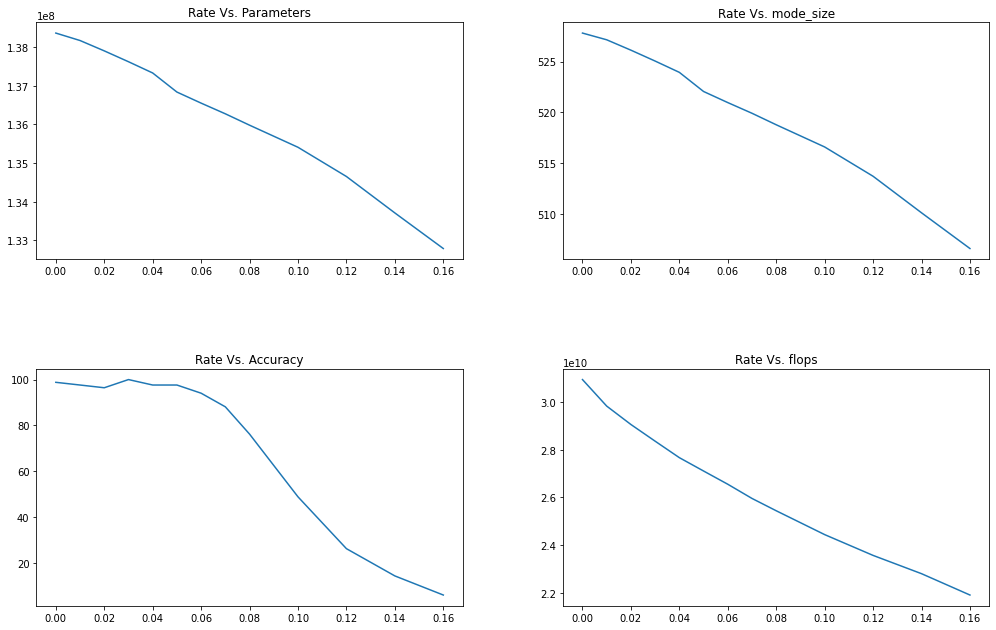

In [ ]:
fig1,a1 =  plt.subplots(2,2)
a1[0][0].plot(rates_w,params_w)
a1[0][0].set_title('Rate Vs. Parameters')
a1[0][1].plot(rates_w,model_size_w)
a1[0][1].set_title('Rate Vs. mode_size')
a1[1][0].plot(rates_w,accuracy_w)
a1[1][0].set_title('Rate Vs. Accuracy')
a1[1][1].plot(rates_w,flops_w)
a1[1][1].set_title('Rate Vs. flops')
fig1.tight_layout()
fig1.set_size_inches(15, 10)
plt.show()

# Stop Here

## Using Pytorch

In [ ]:
pip install torch_pruning

In [ ]:
import torch
from torchvision.models import resnet18, vgg16_bn
import torch_pruning as tp

In [ ]:
model_torch = vgg16_bn(pretrained=True)

In [ ]:
from prettytable import PrettyTable

def count_parameters(model, print_model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    if print_model == True :
      print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model_torch, True)

## Pytorch self trial

In [ ]:
def selfTrial(model_torch) :
  # 1. setup strategy (L1 Norm)
  strategy = tp.strategy.L1Strategy() # or tp.strategy.RandomStrategy()

  # 2. build layer dependency for resnet18
  DG = tp.DependencyGraph()
  DG.build_dependency(model_torch, example_inputs=torch.randn(1,3,224,224))

  # 3. get a pruning plan from the dependency graph.
  pruning_idxs = strategy()# or manually selected pruning_idxs=[2, 6, 9]
  pruning_plan = DG.get_pruning_plan( model_torch.conv1, tp.prune_conv, idxs=pruning_idxs )
  print(pruning_plan)

## Pytorch Code from internet 

In [ ]:
import torch
from torch.autograd import Variable
from torchvision import models
import cv2
import sys
import numpy as np
import time
 
def replace_layers(model, i, indexes, layers):
    if i in indexes:
        return layers[indexes.index(i)]
    return model[i]

def prune_vgg16_conv_layer(model, layer_index, filter_index, use_cuda=False):
    _, conv = list(model.features._modules.items())[layer_index]
    next_conv = None
    offset = 1

    while layer_index + offset <  len(model.features._modules.items()):
        res =  list(model.features._modules.items())[layer_index+offset]
        if isinstance(res[1], torch.nn.modules.conv.Conv2d):
            next_name, next_conv = res
            break
        offset = offset + 1
    
    new_conv = \
        torch.nn.Conv2d(in_channels = conv.in_channels, \
            out_channels = conv.out_channels - 1,
            kernel_size = conv.kernel_size, \
            stride = conv.stride,
            padding = conv.padding,
            dilation = conv.dilation,
            groups = conv.groups,
            bias = (conv.bias is not None))

    old_weights = conv.weight.data.cpu().numpy()
    new_weights = new_conv.weight.data.cpu().numpy()

    new_weights[: filter_index, :, :, :] = old_weights[: filter_index, :, :, :]
    new_weights[filter_index : , :, :, :] = old_weights[filter_index + 1 :, :, :, :]
    new_conv.weight.data = torch.from_numpy(new_weights)
    if use_cuda:
        new_conv.weight.data = new_conv.weight.data.cuda()

    bias_numpy = conv.bias.data.cpu().numpy()

    bias = np.zeros(shape = (bias_numpy.shape[0] - 1), dtype = np.float32)
    bias[:filter_index] = bias_numpy[:filter_index]
    bias[filter_index : ] = bias_numpy[filter_index + 1 :]
    new_conv.bias.data = torch.from_numpy(bias)
    if use_cuda:
        new_conv.bias.data = new_conv.bias.data.cuda()

    if not next_conv is None:
        next_new_conv = \
            torch.nn.Conv2d(in_channels = next_conv.in_channels - 1,\
                out_channels =  next_conv.out_channels, \
                kernel_size = next_conv.kernel_size, \
                stride = next_conv.stride,
                padding = next_conv.padding,
                dilation = next_conv.dilation,
                groups = next_conv.groups,
                bias = (next_conv.bias is not None))

        old_weights = next_conv.weight.data.cpu().numpy()
        new_weights = next_new_conv.weight.data.cpu().numpy()

        new_weights[:, : filter_index, :, :] = old_weights[:, : filter_index, :, :]
        new_weights[:, filter_index : , :, :] = old_weights[:, filter_index + 1 :, :, :]
        next_new_conv.weight.data = torch.from_numpy(new_weights)
        if use_cuda:
            next_new_conv.weight.data = next_new_conv.weight.data.cuda()

        next_new_conv.bias.data = next_conv.bias.data

    if not next_conv is None:
        features = torch.nn.Sequential(
                *(replace_layers(model.features, i, [layer_index, layer_index+offset], \
                    [new_conv, next_new_conv]) for i, _ in enumerate(model.features)))
        del model.features
        del conv

        model.features = features

    else:
        #Prunning the last conv layer. This affects the first linear layer of the classifier.
        model.features = torch.nn.Sequential(
                *(replace_layers(model.features, i, [layer_index], \
                    [new_conv]) for i, _ in enumerate(model.features)))
        layer_index = 0
        old_linear_layer = None
        for _, module in model.classifier._modules.items():
            if isinstance(module, torch.nn.Linear):
                old_linear_layer = module
                break
            layer_index = layer_index  + 1

        if old_linear_layer is None:
            raise BaseException("No linear laye found in classifier")
        params_per_input_channel = old_linear_layer.in_features // conv.out_channels

        new_linear_layer = \
            torch.nn.Linear(old_linear_layer.in_features - params_per_input_channel, 
                old_linear_layer.out_features)
        
        old_weights = old_linear_layer.weight.data.cpu().numpy()
        new_weights = new_linear_layer.weight.data.cpu().numpy()        

        new_weights[:, : filter_index * params_per_input_channel] = \
            old_weights[:, : filter_index * params_per_input_channel]
        new_weights[:, filter_index * params_per_input_channel :] = \
            old_weights[:, (filter_index + 1) * params_per_input_channel :]
        
        new_linear_layer.bias.data = old_linear_layer.bias.data

        new_linear_layer.weight.data = torch.from_numpy(new_weights)
        if use_cuda:
            new_linear_layer.weight.data = new_linear_layer.weight.data.cuda()

        classifier = torch.nn.Sequential(
            *(replace_layers(model.classifier, i, [layer_index], \
                [new_linear_layer]) for i, _ in enumerate(model.classifier)))

        del model.classifier
        del next_conv
        del conv
        model.classifier = classifier

    return model

model = models.vgg16(pretrained=True)
model.train()
t0 = time.time()
new_model = prune_vgg16_conv_layer(model, 28, 10)
print("The prunning took", time.time() - t0)

In [ ]:
count_parameters(new_model, False)

In [ ]:
before = count_parameters(models.vgg16(pretrained=True), False)
after = count_parameters(new_model, False)
print("Params pruned : ", before - after)